In [349]:
import pandas as pd
import numpy as np
import xgboost as xgb
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [350]:
import os 
os.getcwd()

'C:\\Users\\HP\\OneDrive\\Desktop\\ok'

In [351]:
members=pd.read_csv('C:\\Users\\HP\\OneDrive\\Desktop\\ok\\Music\\members.csv')
test=pd.read_csv('C:\\Users\\HP\\OneDrive\\Desktop\\ok\\Music\\test.csv')
train=pd.read_csv('C:\\Users\\HP\\OneDrive\\Desktop\\ok\\Music\\train.csv')
songs=pd.read_csv('C:\\Users\\HP\\OneDrive\\Desktop\\ok\\Music\\songs.csv')

In [352]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [353]:
test.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


In [354]:
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [355]:
print("test:",test.shape)
print("members:",members.shape)
print("songs:",songs.shape)
print("test:",test.shape)

test: (2556790, 6)
members: (34403, 7)
songs: (2296320, 7)
test: (2556790, 6)


In [356]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [357]:
train=train.sample(frac=0.01)

In [358]:
train.shape

(73774, 6)

In [359]:
train=pd.merge(train,songs,on="song_id",how="left")

In [360]:
train.shape

(73774, 12)

In [361]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language
0,TG8+6pKYKH2iJkhMNhsPNSiVODFMbW27i6D1IrKmfwY=,RMv6xdzVwGLCucAtyRR7h5LWV2HKXjJMAtEL2pBeBG4=,discover,NaN,song,0,264940,458,張學友 (Jacky Cheung),Pei Da Jin,NaN,24.0
1,A3S185GCdd6qMEY+4tJpNe2pDWVdb793O3BVlicnUT4=,4gQpRvL41OJn6d78y/HJ0NAV8MHCyjU0IbG0VXWrRSY=,my library,Local playlist more,local-library,1,268356,2022,川本真琴,佐内正史| 川本真琴,川本真琴,17.0
2,bo/M7s1iMkI6/h1lshVmqRKh7hH/p5H+ClRclIZaQYA=,pp4P42e/Z/fxK+SknpeBz9XJ6am7YAI04Ye9Sq005sQ=,radio,Radio,radio,0,279510,465,劉若英 (Rene Liu),木蘭號 AKA 陳韋伶,黃婷,3.0
3,Enop4VnG2BCAHcYYASweLFkVIhVC+e1RVHBiDSm8mOg=,xThkA3Wf+gDDqGu/s0UYuZjKu2v+IWTIzPmU8NdzxX8=,discover,Online playlist more,online-playlist,0,209722,1259,Aminé,Irvin Mejia| Adam Daniel,NaN,52.0
4,BJdlO3PKNXJPqa1yyZz6QizUz5chKnP7703IHF7f9qs=,SndEMtnphl1yNK4zCslHjO8bQxPpgNPSIRUeaMAUyds=,my library,Local playlist more,local-playlist,0,214088,1609,Cover Pop,NaN,NaN,-1.0


In [362]:
train=pd.merge(train,members,on="msno",how="left")

In [363]:
train.shape

(73774, 18)

In [364]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,city,bd,gender,registered_via,registration_init_time,expiration_date
0,TG8+6pKYKH2iJkhMNhsPNSiVODFMbW27i6D1IrKmfwY=,RMv6xdzVwGLCucAtyRR7h5LWV2HKXjJMAtEL2pBeBG4=,discover,NaN,song,0,264940,458,張學友 (Jacky Cheung),Pei Da Jin,NaN,24.0,1,0,NaN,7,20151030,20170930
1,A3S185GCdd6qMEY+4tJpNe2pDWVdb793O3BVlicnUT4=,4gQpRvL41OJn6d78y/HJ0NAV8MHCyjU0IbG0VXWrRSY=,my library,Local playlist more,local-library,1,268356,2022,川本真琴,佐内正史| 川本真琴,川本真琴,17.0,12,38,female,7,20111228,20180708
2,bo/M7s1iMkI6/h1lshVmqRKh7hH/p5H+ClRclIZaQYA=,pp4P42e/Z/fxK+SknpeBz9XJ6am7YAI04Ye9Sq005sQ=,radio,Radio,radio,0,279510,465,劉若英 (Rene Liu),木蘭號 AKA 陳韋伶,黃婷,3.0,15,0,NaN,3,20140401,20170915
3,Enop4VnG2BCAHcYYASweLFkVIhVC+e1RVHBiDSm8mOg=,xThkA3Wf+gDDqGu/s0UYuZjKu2v+IWTIzPmU8NdzxX8=,discover,Online playlist more,online-playlist,0,209722,1259,Aminé,Irvin Mejia| Adam Daniel,NaN,52.0,1,0,NaN,4,20161227,20171002
4,BJdlO3PKNXJPqa1yyZz6QizUz5chKnP7703IHF7f9qs=,SndEMtnphl1yNK4zCslHjO8bQxPpgNPSIRUeaMAUyds=,my library,Local playlist more,local-playlist,0,214088,1609,Cover Pop,NaN,NaN,-1.0,5,32,male,9,20070824,20170922


In [365]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73774 entries, 0 to 73773
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   msno                    73774 non-null  object 
 1   song_id                 73774 non-null  object 
 2   source_system_tab       73517 non-null  object 
 3   source_screen_name      69605 non-null  object 
 4   source_type             73566 non-null  object 
 5   target                  73774 non-null  int64  
 6   song_length             73774 non-null  int64  
 7   genre_ids               72588 non-null  object 
 8   artist_name             73774 non-null  object 
 9   composer                56999 non-null  object 
 10  lyricist                42225 non-null  object 
 11  language                73773 non-null  float64
 12  city                    73774 non-null  int64  
 13  bd                      73774 non-null  int64  
 14  gender                  44055 non-null

In [366]:
train.isnull().sum()/train.isnull().count()*100

msno                       0.000000
song_id                    0.000000
source_system_tab          0.348361
source_screen_name         5.651042
source_type                0.281942
target                     0.000000
song_length                0.000000
genre_ids                  1.607612
artist_name                0.000000
composer                  22.738363
lyricist                  42.764389
language                   0.001355
city                       0.000000
bd                         0.000000
gender                    40.283840
registered_via             0.000000
registration_init_time     0.000000
expiration_date            0.000000
dtype: float64

In [367]:
for i in train.select_dtypes(include=['object']).columns:
    train[i][train[i].isnull()]='unknown'
    train=train.fillna(value=0)

In [368]:

train.registration_init_time= pd.to_datetime(train.registration_init_time, format='%Y%m%d', errors='coerce')
train['registration_init_time_year'] = train['registration_init_time'].dt.year
train['registration_init_time_month'] = train['registration_init_time'].dt.month
train['registration_init_time_day'] = train['registration_init_time'].dt.day


train.expiration_date = pd.to_datetime(train.expiration_date, format='%Y%m%d', errors='coerce')
train['expiration_date_year'] = train['expiration_date'].dt.year
train['expiration_date_month'] = train['expiration_date'].dt.month
train['expiration_date_day'] = train['expiration_date'].dt.day


In [369]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
0,TG8+6pKYKH2iJkhMNhsPNSiVODFMbW27i6D1IrKmfwY=,RMv6xdzVwGLCucAtyRR7h5LWV2HKXjJMAtEL2pBeBG4=,discover,0,song,0,264940,458,張學友 (Jacky Cheung),Pei Da Jin,...,0,7,2015-10-30,2017-09-30,2015,10,30,2017,9,30
1,A3S185GCdd6qMEY+4tJpNe2pDWVdb793O3BVlicnUT4=,4gQpRvL41OJn6d78y/HJ0NAV8MHCyjU0IbG0VXWrRSY=,my library,Local playlist more,local-library,1,268356,2022,川本真琴,佐内正史| 川本真琴,...,female,7,2011-12-28,2018-07-08,2011,12,28,2018,7,8
2,bo/M7s1iMkI6/h1lshVmqRKh7hH/p5H+ClRclIZaQYA=,pp4P42e/Z/fxK+SknpeBz9XJ6am7YAI04Ye9Sq005sQ=,radio,Radio,radio,0,279510,465,劉若英 (Rene Liu),木蘭號 AKA 陳韋伶,...,0,3,2014-04-01,2017-09-15,2014,4,1,2017,9,15
3,Enop4VnG2BCAHcYYASweLFkVIhVC+e1RVHBiDSm8mOg=,xThkA3Wf+gDDqGu/s0UYuZjKu2v+IWTIzPmU8NdzxX8=,discover,Online playlist more,online-playlist,0,209722,1259,Aminé,Irvin Mejia| Adam Daniel,...,0,4,2016-12-27,2017-10-02,2016,12,27,2017,10,2
4,BJdlO3PKNXJPqa1yyZz6QizUz5chKnP7703IHF7f9qs=,SndEMtnphl1yNK4zCslHjO8bQxPpgNPSIRUeaMAUyds=,my library,Local playlist more,local-playlist,0,214088,1609,Cover Pop,0,...,male,9,2007-08-24,2017-09-22,2007,8,24,2017,9,22


In [370]:
train ['registration_init_time'] = train["registration_init_time"].astype("category") 
train["expiration_date"] = train['expiration_date'].astype("category")

In [371]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
0,TG8+6pKYKH2iJkhMNhsPNSiVODFMbW27i6D1IrKmfwY=,RMv6xdzVwGLCucAtyRR7h5LWV2HKXjJMAtEL2pBeBG4=,discover,0,song,0,264940,458,張學友 (Jacky Cheung),Pei Da Jin,...,0,7,2015-10-30,2017-09-30,2015,10,30,2017,9,30
1,A3S185GCdd6qMEY+4tJpNe2pDWVdb793O3BVlicnUT4=,4gQpRvL41OJn6d78y/HJ0NAV8MHCyjU0IbG0VXWrRSY=,my library,Local playlist more,local-library,1,268356,2022,川本真琴,佐内正史| 川本真琴,...,female,7,2011-12-28,2018-07-08,2011,12,28,2018,7,8
2,bo/M7s1iMkI6/h1lshVmqRKh7hH/p5H+ClRclIZaQYA=,pp4P42e/Z/fxK+SknpeBz9XJ6am7YAI04Ye9Sq005sQ=,radio,Radio,radio,0,279510,465,劉若英 (Rene Liu),木蘭號 AKA 陳韋伶,...,0,3,2014-04-01,2017-09-15,2014,4,1,2017,9,15
3,Enop4VnG2BCAHcYYASweLFkVIhVC+e1RVHBiDSm8mOg=,xThkA3Wf+gDDqGu/s0UYuZjKu2v+IWTIzPmU8NdzxX8=,discover,Online playlist more,online-playlist,0,209722,1259,Aminé,Irvin Mejia| Adam Daniel,...,0,4,2016-12-27,2017-10-02,2016,12,27,2017,10,2
4,BJdlO3PKNXJPqa1yyZz6QizUz5chKnP7703IHF7f9qs=,SndEMtnphl1yNK4zCslHjO8bQxPpgNPSIRUeaMAUyds=,my library,Local playlist more,local-playlist,0,214088,1609,Cover Pop,0,...,male,9,2007-08-24,2017-09-22,2007,8,24,2017,9,22


In [372]:
for col in train.select_dtypes(include=['object']).columns: 
    train[col]=train[col].astype("category")
for col in train.select_dtypes(include=['category']).columns:
    train[col]=train[col].cat.codes

In [373]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
0,8976,12539,1,0,9,0,264940,137,5269,5516,...,0,7,3220,586,2015,10,30,2017,9,30
1,3454,2831,4,9,4,1,268356,72,5225,7674,...,1,7,1937,866,2011,12,28,2018,7,8
2,11635,23094,6,14,8,0,279510,139,4921,8425,...,0,3,2644,571,2014,4,1,2017,9,15
3,4805,26416,1,12,7,0,209722,34,265,2919,...,0,4,3579,588,2016,12,27,2017,10,2
4,3810,13157,4,9,5,0,214088,49,932,0,...,2,9,698,578,2007,8,24,2017,9,22


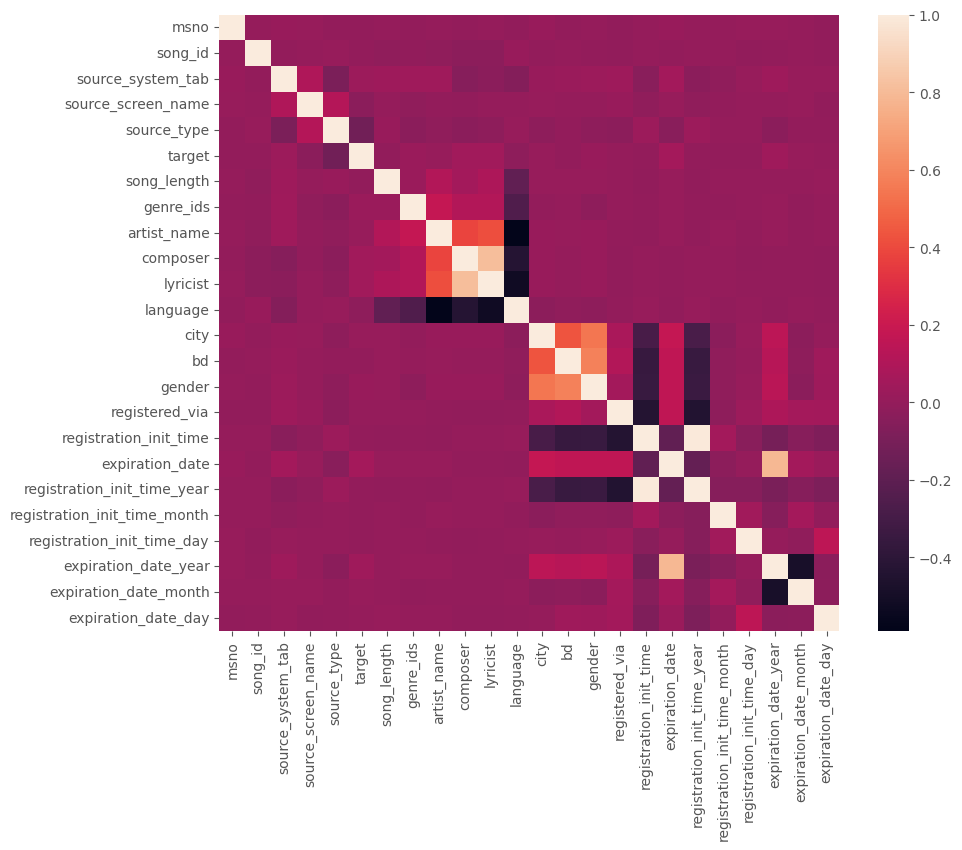

In [374]:
plt.figure(figsize=[10,8])
sns.heatmap(train.corr())
plt.show()

In [375]:
train =train.drop(["expiration_date", "lyricist"], axis=1)

In [376]:
train.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target', 'song_length', 'genre_ids', 'artist_name',
       'composer', 'language', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'registration_init_time_year',
       'registration_init_time_month', 'registration_init_time_day',
       'expiration_date_year', 'expiration_date_month', 'expiration_date_day'],
      dtype='object')

In [377]:
train.shape

(73774, 22)

In [378]:
train=train.copy()

In [379]:
X_train=train.drop(['target'],axis=1).values 
Y_train=train["target" ].values

In [380]:
X_train.shape

(73774, 21)

In [381]:
Y_train.shape

(73774,)

In [382]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)

In [383]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=250, max_depth=25, random_state=0)
clf.fit(x_train,y_train) 

RandomForestClassifier(max_depth=25, n_estimators=250, random_state=0)

In [384]:
train_plot= pd.DataFrame({'features': train.columns[train.columns != 'target'], 
                   'importances': clf.feature_importances_})
#train_plot = pd.DataFrame(importance_data)
train_plot = train_plot.sort_values('importances', ascending=False)  

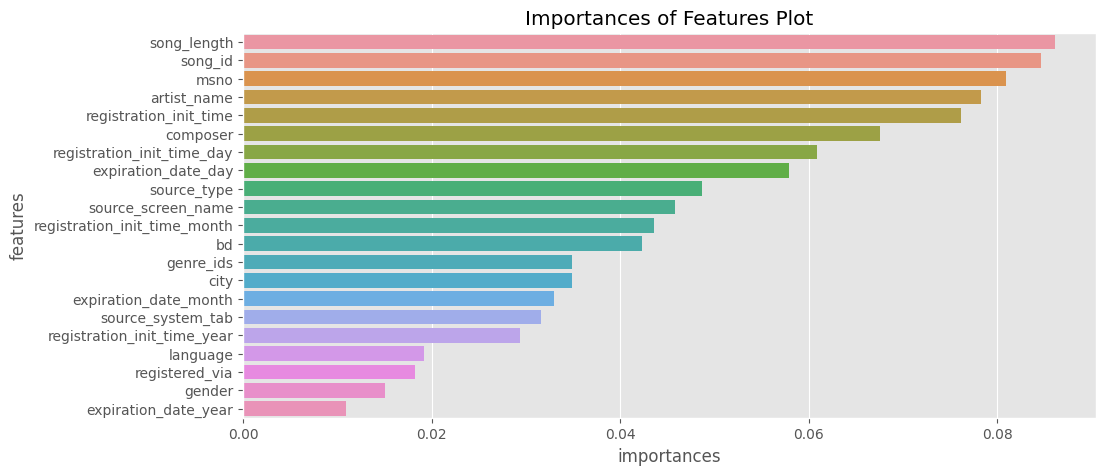

In [385]:
plt.figure(figsize=[11,5])
sns.barplot(x=train_plot.importances, y=train_plot.features)
plt.title('Importances of Features Plot')
plt.show() 

In [386]:
train2=train.copy()

In [387]:
train2=train2.drop(train_plot.features[train_plot.importances < 0.04].tolist(), axis=1)

In [388]:
train2.columns

Index(['msno', 'song_id', 'source_screen_name', 'source_type', 'target',
       'song_length', 'artist_name', 'composer', 'bd',
       'registration_init_time', 'registration_init_time_month',
       'registration_init_time_day', 'expiration_date_day'],
      dtype='object')

In [389]:
train3=train.copy()

In [390]:
x_train1=train3.drop(['target'], axis=1).values 
Y_train1=train3['target'].values

In [391]:
x_train,x_test,y_train,y_test=train_test_split(x_train1, Y_train1, test_size=0.25)

In [392]:
model2 = xgb.XGBClassifier(learning_rate=0.1, max_depth=15, min_child_weight=5, n_estimators=250)
model2.fit(x_train1, Y_train1)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=250, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [393]:
X_train.shape

(73774, 21)

In [394]:
prediction=model2.predict(x_test)

In [395]:
from sklearn import metrics

In [399]:
print(metrics.classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      9139
           1       0.99      1.00      0.99      9305

    accuracy                           0.99     18444
   macro avg       0.99      0.99      0.99     18444
weighted avg       0.99      0.99      0.99     18444

